# Testing the Slime Mould Algorithm

Interfaced to CoFI by Juerg and Claude...

--------
## I think all Markdown cells like the next one will not be needed but they appear to contain some info that might be needed in a cleanup

E.g how to supress warnings?
--------

# Suppress ALL output for cleaner notebook
import warnings
import logging
import os
import sys
from contextlib import redirect_stdout, redirect_stderr
from io import StringIO

# Comprehensive warning and output suppression
warnings.filterwarnings('ignore')
os.environ['PYTHONWARNINGS'] = 'ignore'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# Set root logger to CRITICAL to suppress all INFO messages
logging.getLogger().setLevel(logging.CRITICAL)
logging.basicConfig(level=logging.CRITICAL)

# Suppress stdout/stderr for imports
old_stdout = sys.stdout
old_stderr = sys.stderr
sys.stdout = StringIO()
sys.stderr = StringIO()

try:
    # Pre-import mealpy to suppress its initialization messages
    import mealpy
    from mealpy.bio_based import SMA
    # Disable mealpy logging after import
    mealpy_logger = logging.getLogger('mealpy')
    mealpy_logger.setLevel(logging.CRITICAL)
    mealpy_logger.disabled = True
except:
    pass

# Restore stdout/stderr
sys.stdout = old_stdout
sys.stderr = old_stderr

print("🔇 Output suppression activated for clean notebook execution")

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
import seaborn as sns
import warnings
import logging

# Additional suppression for mealpy logging
def suppress_mealpy_logging():
    """Comprehensively suppress mealpy logging output"""
    # Disable all mealpy loggers
    for name in logging.root.manager.loggerDict:
        if 'mealpy' in name:
            logger = logging.getLogger(name)
            logger.setLevel(logging.CRITICAL)
            logger.disabled = True
    
    # Also disable the root logger during optimization
    root_logger = logging.getLogger()
    root_logger.setLevel(logging.CRITICAL)

# CoFI imports
from cofi import BaseProblem, InversionOptions, Inversion

# Set style for beautiful plots
plt.style.use('default')
sns.set_palette("husl")
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print(" Welcome to the Slime Mould Algorithm Demo!")
print(" Imports successful - ready to explore bio-inspired optimization")

 Welcome to the Slime Mould Algorithm Demo!
 Imports successful - ready to explore bio-inspired optimization


##  Test Function: Modified Himmelblau Function

We'll use a modified version of the classic Himmelblau function, which is a well-known multi-modal optimization benchmark. The original Himmelblau function has four global minima, making it an excellent test case for global optimization algorithms.

### Function Definition

$$f(x, y) = (x^2 + y - 11)^2 + (x + y^2 - 7)^2 + (x - 3)^2 + (y - 2)^2$$

The modification adds a regularization term $(x - 3)^2 + (y - 2)^2$ that creates a preferred global minimum at $(3, 2)$.

In [2]:
def modified_himmelblau(x):
    """
    Modified Himmelblau function with additional regularization term.
    
    Original function has 4 global minima. The modification adds a bias
    towards the point (3, 2), making it the preferred global minimum.
    
    Args:
        x: array-like, [x1, x2] coordinates
        
    Returns:
        float: Function value
    """
    x1, x2 = x[0], x[1]
    # Original Himmelblau terms
    term1 = (x1**2 + x2 - 11)**2
    term2 = (x1 + x2**2 - 7)**2
    # Regularization term (bias towards (3, 2))
    term3 = (x1 - 3)**2 + (x2 - 2)**2
    
    return term1 + term2 + term3

# Test the function
test_point = [3.0, 2.0]
print(f" Function value at (3, 2): {modified_himmelblau(test_point):.6f}")
print(f" This should be close to the global minimum!")

 Function value at (3, 2): 0.000000
 This should be close to the global minimum!


##  Visualizing the Optimization Landscape

Let's visualize the modified Himmelblau function to understand the optimization challenge:

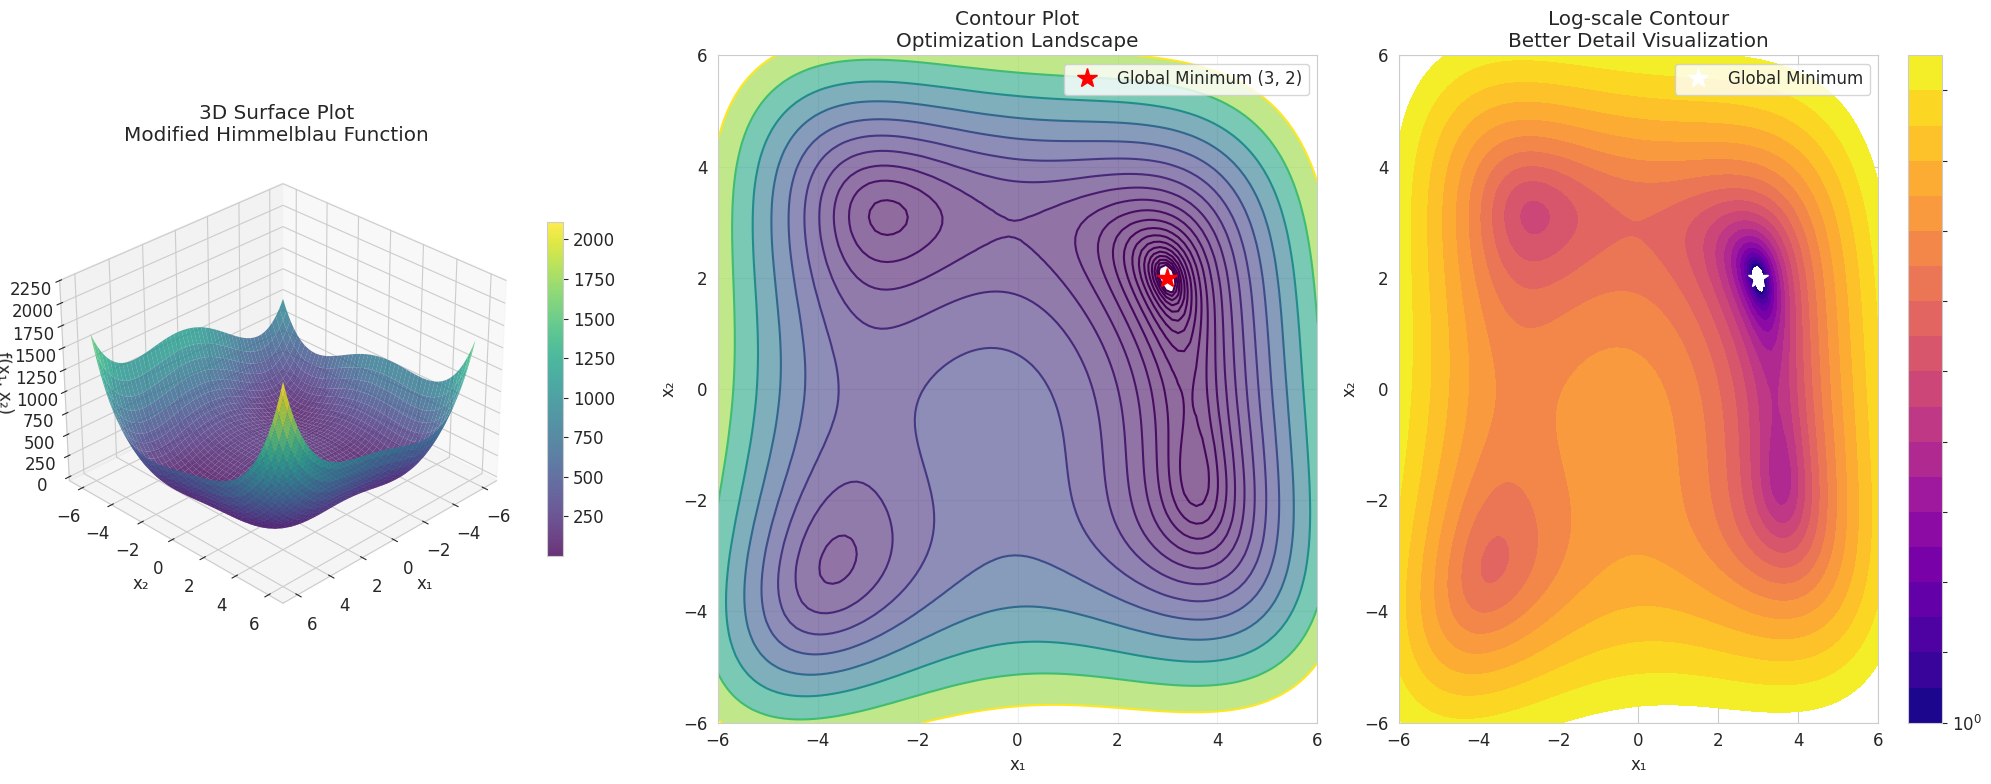

Visualization complete!
The function has multiple local minima with a preferred global minimum at (3, 2)


In [3]:
# Create a meshgrid for visualization
x_range = np.linspace(-6, 6, 100)
y_range = np.linspace(-6, 6, 100)
X, Y = np.meshgrid(x_range, y_range)

# Set the font to DejaVu Sans
plt.rcParams['font.family'] = 'DejaVu Sans'

# Evaluate function over the grid
Z = np.zeros_like(X)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = modified_himmelblau([X[i, j], Y[i, j]])

# Create subplots
fig = plt.figure(figsize=(20, 8))

# 3D surface plot
ax1 = fig.add_subplot(131, projection='3d')
surf = ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8, linewidth=0)
ax1.set_xlabel('x₁')
ax1.set_ylabel('x₂')
ax1.set_zlabel('f(x₁, x₂)')
ax1.set_title('3D Surface Plot\nModified Himmelblau Function')
ax1.view_init(elev=30, azim=45)
fig.colorbar(surf, ax=ax1, shrink=0.5)

# Contour plot
ax2 = fig.add_subplot(132)
levels = np.logspace(0, 3, 20)  # Logarithmic levels for better visualization
contour = ax2.contour(X, Y, Z, levels=levels, cmap='viridis')
ax2.contourf(X, Y, Z, levels=levels, cmap='viridis', alpha=0.6)
ax2.set_xlabel('x₁')
ax2.set_ylabel('x₂')
ax2.set_title('Contour Plot\nOptimization Landscape')
ax2.grid(True, alpha=0.3)

# Mark the global minimum
ax2.plot(3, 2, 'r*', markersize=15, label='Global Minimum (3, 2)')
ax2.legend()

# Log-scale contour for better detail
ax3 = fig.add_subplot(133)
contour_log = ax3.contourf(X, Y, Z, levels=levels, norm=LogNorm(), cmap='plasma')
ax3.set_xlabel('x₁')
ax3.set_ylabel('x₂')
ax3.set_title('Log-scale Contour\nBetter Detail Visualization')
ax3.plot(3, 2, 'w*', markersize=15, label='Global Minimum')
ax3.legend()
fig.colorbar(contour_log, ax=ax3)

plt.tight_layout()
plt.show()

print("Visualization complete!")
print("The function has multiple local minima with a preferred global minimum at (3, 2)")

##  Setting Up the CoFI Optimization Problem

Now let's set up our optimization problem using CoFI's elegant framework:

In [4]:
# Define the optimization problem using CoFI
problem = BaseProblem()
problem.set_objective(modified_himmelblau)  # Our objective function
problem.set_model_shape((2,))               # 2D optimization problem
problem.set_bounds((-6, 6))                 # Search space bounds

print(" CoFI Problem Setup Complete!")
print(f" Problem dimension: {np.prod(problem.model_shape)}")
print(f" Objective function: Modified Himmelblau")
print(f" Search bounds: {problem.bounds}")
print("\n Ready for optimization with Slime Mould Algorithm!")

 CoFI Problem Setup Complete!
 Problem dimension: 2
 Objective function: Modified Himmelblau
 Search bounds: (-6, 6)

 Ready for optimization with Slime Mould Algorithm!


# Configure SMA optimization options
sma_options = InversionOptions()
sma_options.set_tool("mealpy.sma")
sma_options.set_params(
    algorithm="OriginalSMA",  # Use the original SMA variant
    epoch=100,                # Number of iterations
    pop_size=50,             # Population size (number of slime moulds)
    pr=0.03,                 # Probability parameter
    seed=42,                 # For reproducible results
    verbose=False            # Reduce output for cleaner notebook
)

print("⚙️ SMA Configuration:")
print(f"   🔧 Algorithm: OriginalSMA")
print(f"   🔄 Epochs: 100")
print(f"   👥 Population: 50 slime moulds")
print(f"   🎲 Seed: 42 (reproducible results)")

# Run the optimization with comprehensive output suppression
print("\n🚀 Starting SMA optimization...")

# Comprehensive suppression: both stdout and logging
import sys
from io import StringIO

# Store original logging level
original_log_level = logging.getLogger().level

# Suppress both stdout and logging
old_stdout = sys.stdout
old_stderr = sys.stderr
sys.stdout = StringIO()
sys.stderr = StringIO()

try:
    # Suppress mealpy logging
    suppress_mealpy_logging()
    
    sma_inversion = Inversion(problem, sma_options)
    sma_result = sma_inversion.run()
finally:
    # Restore stdout/stderr and logging
    sys.stdout = old_stdout
    sys.stderr = old_stderr
    logging.getLogger().setLevel(original_log_level)

print("🎉 SMA Optimization Complete!")
print(f"✨ Optimal solution: [{sma_result.model[0]:.6f}, {sma_result.model[1]:.6f}]")
print(f"🎯 Objective value: {sma_result.objective:.8f}")
print(f"📊 Success: {sma_result.success}")

# Calculate distance from true optimum
true_optimum = np.array([3.0, 2.0])
distance = np.linalg.norm(sma_result.model - true_optimum)
print(f"📏 Distance from true optimum (3, 2): {distance:.6f}")

In [5]:
# Configure SMA optimization options
sma_options = InversionOptions()
sma_options.set_tool("mealpy.sma")
sma_options.set_params(
    algorithm="OriginalSMA",  # Use the original SMA variant
    epoch=100,                # Number of iterations
    pop_size=50,             # Population size (number of slime moulds)
    pr=0.03,                 # Probability parameter
    seed=42,                 # For reproducible results
    verbose=False            # Reduce output for cleaner notebook
)

print(" SMA Configuration:")
print(f"    Algorithm: OriginalSMA")
print(f"    Epochs: 100")
print(f"    Population: 50 slime moulds")
print(f"    Seed: 42 (reproducible results)")

# Run the optimization with output suppression
print("\n Starting SMA optimiza tion...")

# Suppress mealpy output during optimization
import sys
from io import StringIO
old_stdout = sys.stdout
sys.stdout = StringIO()

try:
    sma_inversion = Inversion(problem, sma_options)
    sma_result = sma_inversion.run()
finally:
    sys.stdout = old_stdout

print(" SMA Optimization Complete!")
print(f" Optimal solution: [{sma_result.model[0]:.6f}, {sma_result.model[1]:.6f}]")
print(f" Objective value: {sma_result.objective:.8f}")
print(f" Success: {sma_result.success}")

# Calculate distance from true optimum
true_optimum = np.array([3.0, 2.0])
distance = np.linalg.norm(sma_result.model - true_optimum)
print(f" Distance from true optimum (3, 2): {distance:.6f}")

2025/08/14 10:32:17 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: OriginalSMA(epoch=100, pop_size=50, p_t=0.03)
2025/08/14 10:32:17 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 1, Current best: 17.191332590618202, Global best: 5.47541751992843, Runtime: 0.00274 seconds
2025/08/14 10:32:17 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 2, Current best: 0.7195572973115484, Global best: 0.7195572973115484, Runtime: 0.00242 seconds
2025/08/14 10:32:17 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 3, Current best: 0.43679064725064476, Global best: 0.43679064725064476, Runtime: 0.00208 seconds
2025/08/14 10:32:17 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 4, Current best: 3.1733499903491484, Global best: 0.43679064725064476, Runtime: 0.00221 seconds
2025/08/14 10:32:17 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 5, Current best: 0.6837798041313533, Global best: 0.43679064725064476, Runtime:

 SMA Configuration:
    Algorithm: OriginalSMA
    Epochs: 100
    Population: 50 slime moulds
    Seed: 42 (reproducible results)

 Starting SMA optimiza tion...


2025/08/14 10:32:17 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 65, Current best: 0.013931341579956765, Global best: 0.00012309055254055548, Runtime: 0.00201 seconds
2025/08/14 10:32:17 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 66, Current best: 6.200651655629685e-07, Global best: 6.200651655629685e-07, Runtime: 0.00202 seconds
2025/08/14 10:32:17 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 67, Current best: 0.006240183655937041, Global best: 6.200651655629685e-07, Runtime: 0.00220 seconds
2025/08/14 10:32:17 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 68, Current best: 0.03328905011603878, Global best: 6.200651655629685e-07, Runtime: 0.00211 seconds
2025/08/14 10:32:17 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 69, Current best: 0.017658812415186992, Global best: 6.200651655629685e-07, Runtime: 0.00206 seconds
2025/08/14 10:32:17 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: 

 SMA Optimization Complete!
 Optimal solution: [3.000041, 1.999893]
 Objective value: 0.00000018
 Success: True
 Distance from true optimum (3, 2): 0.000115


--------
## The warning messages like those above need to be controlled. Not sure if they come from Calude or mealpy. They are not really warnings.
--------

# Compare different SMA algorithms
algorithms = ["OriginalSMA", "DevSMA"]
results = {}
colors = ['#FF6B6B', '#4ECDC4']

print("🔬 Comparing SMA Algorithm Variants...\n")

# Comprehensive suppression setup
import sys
from io import StringIO

for i, algo in enumerate(algorithms):
    # Configure options for each algorithm
    options = InversionOptions()
    options.set_tool("mealpy.sma")
    options.set_params(
        algorithm=algo,
        epoch=80,
        pop_size=40,
        seed=42
    )
    
    # Run optimization with comprehensive suppression
    print(f"🧬 Running {algo}...")
    
    # Store original state
    original_log_level = logging.getLogger().level
    old_stdout = sys.stdout
    old_stderr = sys.stderr
    
    # Suppress all output
    sys.stdout = StringIO()
    sys.stderr = StringIO()
    
    try:
        suppress_mealpy_logging()
        inversion = Inversion(problem, options)
        result = inversion.run()
    finally:
        # Restore original state
        sys.stdout = old_stdout
        sys.stderr = old_stderr
        logging.getLogger().setLevel(original_log_level)
    
    # Store results
    results[algo] = {
        'solution': result.model,
        'objective': result.objective,
        'distance': np.linalg.norm(result.model - true_optimum)
    }
    
    print(f"   ✅ Solution: [{result.model[0]:.4f}, {result.model[1]:.4f}]")
    print(f"   🎯 Objective: {result.objective:.6f}")
    print(f"   📏 Distance: {results[algo]['distance']:.6f}\n")

print("📊 Algorithm Comparison Complete!")

In [6]:
# Compare different SMA algorithms
algorithms = ["OriginalSMA", "DevSMA"]
results = {}
colors = ['#FF6B6B', '#4ECDC4']

print(" Comparing SMA Algorithm Variants...\n")

# Suppress mealpy output during optimization runs
import sys
from io import StringIO

for i, algo in enumerate(algorithms):
    # Configure options for each algorithm
    options = InversionOptions()
    options.set_tool("mealpy.sma")
    options.set_params(
        algorithm=algo,
        epoch=80,
        pop_size=40,
        seed=42
    )
    
    # Run optimization with suppressed output
    print(f" Running {algo}...")
    old_stdout = sys.stdout
    sys.stdout = StringIO()
    
    try:
        inversion = Inversion(problem, options)
        result = inversion.run()
    finally:
        sys.stdout = old_stdout
    
    # Store results
    results[algo] = {
        'solution': result.model,
        'objective': result.objective,
        'distance': np.linalg.norm(result.model - true_optimum)
    }
    
    print(f"    Solution: [{result.model[0]:.4f}, {result.model[1]:.4f}]")
    print(f"    Objective: {result.objective:.6f}")
    print(f"    Distance: {results[algo]['distance']:.6f}\n")

print(" Algorithm Comparison Complete!")

2025/08/14 10:32:17 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: OriginalSMA(epoch=80, pop_size=40, p_t=0.03)
2025/08/14 10:32:17 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 1, Current best: 16.776018538163846, Global best: 16.776018538163846, Runtime: 0.00248 seconds
2025/08/14 10:32:17 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 2, Current best: 11.925299221622177, Global best: 11.925299221622177, Runtime: 0.00187 seconds
2025/08/14 10:32:17 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 3, Current best: 5.864212639234755, Global best: 5.864212639234755, Runtime: 0.00178 seconds
2025/08/14 10:32:17 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 4, Current best: 1.1754798171474203, Global best: 1.1754798171474203, Runtime: 0.00156 seconds
2025/08/14 10:32:17 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 5, Current best: 5.439066088283893, Global best: 1.1754798171474203, Runtime: 0.001

 Comparing SMA Algorithm Variants...

 Running OriginalSMA...
    Solution: [3.0000, 2.0000]
    Objective: 0.000000
    Distance: 0.000054

 Running DevSMA...


2025/08/14 10:32:17 PM, INFO, mealpy.bio_based.SMA.DevSMA: >>>Problem: P, Epoch: 23, Current best: 0.02929595034187627, Global best: 0.02929595034187627, Runtime: 0.00146 seconds
2025/08/14 10:32:17 PM, INFO, mealpy.bio_based.SMA.DevSMA: >>>Problem: P, Epoch: 24, Current best: 0.02929595034187627, Global best: 0.02929595034187627, Runtime: 0.00173 seconds
2025/08/14 10:32:17 PM, INFO, mealpy.bio_based.SMA.DevSMA: >>>Problem: P, Epoch: 25, Current best: 0.02929595034187627, Global best: 0.02929595034187627, Runtime: 0.00193 seconds
2025/08/14 10:32:17 PM, INFO, mealpy.bio_based.SMA.DevSMA: >>>Problem: P, Epoch: 26, Current best: 0.02929595034187627, Global best: 0.02929595034187627, Runtime: 0.00168 seconds
2025/08/14 10:32:17 PM, INFO, mealpy.bio_based.SMA.DevSMA: >>>Problem: P, Epoch: 27, Current best: 0.02929595034187627, Global best: 0.02929595034187627, Runtime: 0.00140 seconds
2025/08/14 10:32:17 PM, INFO, mealpy.bio_based.SMA.DevSMA: >>>Problem: P, Epoch: 28, Current best: 0.0292

    Solution: [2.9977, 2.0051]
    Objective: 0.000436
    Distance: 0.005594

 Algorithm Comparison Complete!


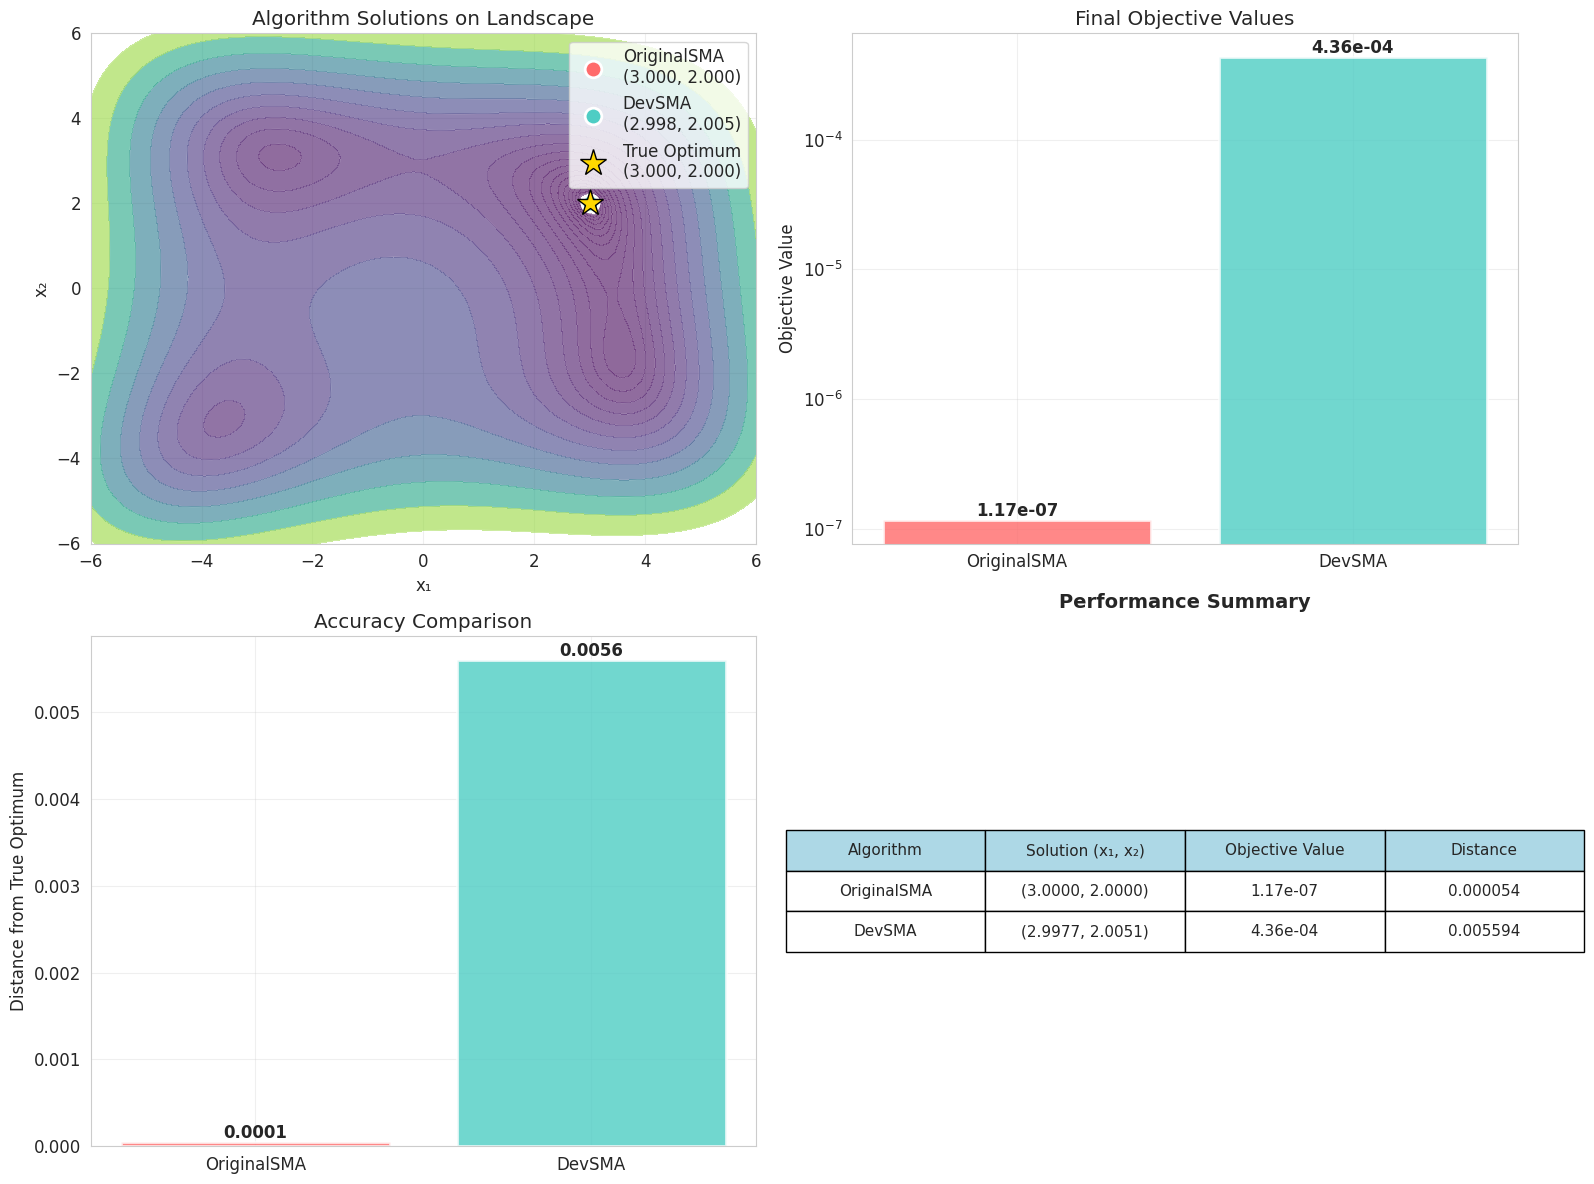

Comprehensive algorithm comparison visualization complete!


In [7]:
# Visualize the comparison results
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Set the font to DejaVu Sans
plt.rcParams['font.family'] = 'DejaVu Sans'

# Plot 1: Solutions on contour plot
contour = ax1.contourf(X, Y, Z, levels=levels, cmap='viridis', alpha=0.6)
ax1.contour(X, Y, Z, levels=levels, colors='white', alpha=0.3, linewidths=0.5)

# Plot solutions
for i, (algo, result) in enumerate(results.items()):
    ax1.plot(result['solution'][0], result['solution'][1], 
            'o', color=colors[i], markersize=12, 
            label=f'{algo}\n({result["solution"][0]:.3f}, {result["solution"][1]:.3f})',
            markeredgecolor='white', markeredgewidth=2)

# Mark true optimum
ax1.plot(3, 2, '*', color='gold', markersize=20, 
        label='True Optimum\n(3.000, 2.000)',
        markeredgecolor='black', markeredgewidth=1)

ax1.set_xlabel('x₁')
ax1.set_ylabel('x₂')
ax1.set_title('Algorithm Solutions on Landscape')
ax1.legend(loc='upper right')
ax1.grid(True, alpha=0.3)

# Plot 2: Objective values comparison
algos = list(results.keys())
objectives = [results[algo]['objective'] for algo in algos]
bars = ax2.bar(algos, objectives, color=colors, alpha=0.8, edgecolor='white', linewidth=2)
ax2.set_ylabel('Objective Value')
ax2.set_title('Final Objective Values')
ax2.set_yscale('log')  # Log scale for better comparison
ax2.grid(True, alpha=0.3)

# Add value labels on bars
for bar, obj in zip(bars, objectives):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{obj:.2e}', ha='center', va='bottom', fontweight='bold')

# Plot 3: Distance from optimum
distances = [results[algo]['distance'] for algo in algos]
bars = ax3.bar(algos, distances, color=colors, alpha=0.8, edgecolor='white', linewidth=2)
ax3.set_ylabel('Distance from True Optimum')
ax3.set_title('Accuracy Comparison')
ax3.grid(True, alpha=0.3)

# Add value labels
for bar, dist in zip(bars, distances):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
            f'{dist:.4f}', ha='center', va='bottom', fontweight='bold')

# Plot 4: Performance summary table
ax4.axis('tight')
ax4.axis('off')

# Create table data
table_data = []
for algo in algos:
    result = results[algo]
    table_data.append([
        algo,
        f"({result['solution'][0]:.4f}, {result['solution'][1]:.4f})",
        f"{result['objective']:.2e}",
        f"{result['distance']:.6f}"
    ])

table = ax4.table(cellText=table_data,
                 colLabels=['Algorithm', 'Solution (x₁, x₂)', 'Objective Value', 'Distance'],
                 cellLoc='center',
                 loc='center',
                 colColours=['lightblue']*4)

table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1.2, 2)
ax4.set_title('Performance Summary', pad=20, fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("Comprehensive algorithm comparison visualization complete!")

--------
## Not sure what the difference is between original and DevSMA. May need to consult mealpy. My reading of the above is that Original works bext here.
--------

# Multiple runs for statistical analysis
n_runs = 10
seeds = range(42, 42 + n_runs)

print(f"🎲 Running {n_runs} independent SMA optimizations...\n")

multi_results = {
    'solutions': [],
    'objectives': [],
    'distances': []
}

# Comprehensive suppression setup
import sys
from io import StringIO

for i, seed in enumerate(seeds):
    # Configure options
    options = InversionOptions()
    options.set_tool("mealpy.sma")
    options.set_params(
        algorithm="OriginalSMA",
        epoch=60,
        pop_size=30,
        seed=seed
    )
    
    # Store original state
    original_log_level = logging.getLogger().level
    old_stdout = sys.stdout
    old_stderr = sys.stderr
    
    # Suppress all output
    sys.stdout = StringIO()
    sys.stderr = StringIO()
    
    try:
        suppress_mealpy_logging()
        inversion = Inversion(problem, options)
        result = inversion.run()
    finally:
        # Restore original state
        sys.stdout = old_stdout
        sys.stderr = old_stderr
        logging.getLogger().setLevel(original_log_level)
    
    # Store results
    multi_results['solutions'].append(result.model)
    multi_results['objectives'].append(result.objective)
    distance = np.linalg.norm(result.model - true_optimum)
    multi_results['distances'].append(distance)
    
    print(f"Run {i+1:2d}: [{result.model[0]:.4f}, {result.model[1]:.4f}] | "
          f"Obj: {result.objective:.2e} | Dist: {distance:.4f}")

# Statistical analysis
objectives = np.array(multi_results['objectives'])
distances = np.array(multi_results['distances'])

print("\n📈 Statistical Summary:")
print(f"🎯 Objective - Mean: {objectives.mean():.2e}, Std: {objectives.std():.2e}")
print(f"📏 Distance  - Mean: {distances.mean():.4f}, Std: {distances.std():.4f}")
print(f"🏆 Best objective: {objectives.min():.2e}")
print(f"🎯 Success rate (dist < 0.1): {(distances < 0.1).sum()}/{n_runs} ({100*(distances < 0.1).mean():.1f}%)")

In [8]:
# Multiple runs for statistical analysis
n_runs = 10
seeds = range(42, 42 + n_runs)

print(f"🎲 Running {n_runs} independent SMA optimizations...\n")

multi_results = {
    'solutions': [],
    'objectives': [],
    'distances': []
}

# Suppress mealpy output during runs
import sys
from io import StringIO

for i, seed in enumerate(seeds):
    # Configure options
    options = InversionOptions()
    options.set_tool("mealpy.sma")
    options.set_params(
        algorithm="OriginalSMA",
        epoch=60,
        pop_size=30,
        seed=seed
    )
    
    # Run optimization with suppressed output
    old_stdout = sys.stdout
    sys.stdout = StringIO()
    
    try:
        inversion = Inversion(problem, options)
        result = inversion.run()
    finally:
        sys.stdout = old_stdout
    
    # Store results
    multi_results['solutions'].append(result.model)
    multi_results['objectives'].append(result.objective)
    distance = np.linalg.norm(result.model - true_optimum)
    multi_results['distances'].append(distance)
    
    print(f"Run {i+1:2d}: [{result.model[0]:.4f}, {result.model[1]:.4f}] | "
          f"Obj: {result.objective:.2e} | Dist: {distance:.4f}")

# Statistical analysis
objectives = np.array(multi_results['objectives'])
distances = np.array(multi_results['distances'])

print("\n📈 Statistical Summary:")
print(f"🎯 Objective - Mean: {objectives.mean():.2e}, Std: {objectives.std():.2e}")
print(f"📏 Distance  - Mean: {distances.mean():.4f}, Std: {distances.std():.4f}")
print(f"🏆 Best objective: {objectives.min():.2e}")
print(f"🎯 Success rate (dist < 0.1): {(distances < 0.1).sum()}/{n_runs} ({100*(distances < 0.1).mean():.1f}%)")

2025/08/14 10:32:17 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: OriginalSMA(epoch=60, pop_size=30, p_t=0.03)
2025/08/14 10:32:17 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 1, Current best: 61.833457811622424, Global best: 60.74701365632631, Runtime: 0.00190 seconds
2025/08/14 10:32:17 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 2, Current best: 12.223445487456559, Global best: 12.223445487456559, Runtime: 0.00138 seconds
2025/08/14 10:32:17 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 3, Current best: 4.393823738300645, Global best: 4.393823738300645, Runtime: 0.00189 seconds
2025/08/14 10:32:17 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 4, Current best: 1.9661844202837886, Global best: 1.9661844202837886, Runtime: 0.00142 seconds
2025/08/14 10:32:17 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 5, Current best: 4.22692777934702, Global best: 1.9661844202837886, Runtime: 0.00122

🎲 Running 10 independent SMA optimizations...

Run  1: [2.9996, 2.0005] | Obj: 5.71e-06 | Dist: 0.0006


2025/08/14 10:32:18 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 54, Current best: 0.0002078306312146278, Global best: 0.0001286368395771407, Runtime: 0.00115 seconds
2025/08/14 10:32:18 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 55, Current best: 0.0002299168340943481, Global best: 0.0001286368395771407, Runtime: 0.00140 seconds
2025/08/14 10:32:18 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 56, Current best: 0.0002646002613455251, Global best: 0.0001286368395771407, Runtime: 0.00119 seconds
2025/08/14 10:32:18 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 57, Current best: 0.00019172520964632258, Global best: 0.0001286368395771407, Runtime: 0.00120 seconds
2025/08/14 10:32:18 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 58, Current best: 0.000100833306456816, Global best: 0.000100833306456816, Runtime: 0.00119 seconds
2025/08/14 10:32:18 PM, INFO, mealpy.bio_based.SMA.OriginalSM

Run  2: [2.9993, 1.9991] | Obj: 4.85e-05 | Dist: 0.0012
Run  3: [2.9985, 2.0005] | Obj: 7.85e-05 | Dist: 0.0016
Run  4: [3.0002, 1.9990] | Obj: 1.62e-05 | Dist: 0.0011


2025/08/14 10:32:18 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 12, Current best: 0.14253354905165483, Global best: 0.14253354905165483, Runtime: 0.00127 seconds
2025/08/14 10:32:18 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 13, Current best: 0.2988862724378266, Global best: 0.14253354905165483, Runtime: 0.00129 seconds
2025/08/14 10:32:18 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 14, Current best: 0.2284943723581983, Global best: 0.14253354905165483, Runtime: 0.00118 seconds
2025/08/14 10:32:18 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 15, Current best: 2.6709208194634053, Global best: 0.14253354905165483, Runtime: 0.00122 seconds
2025/08/14 10:32:18 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 16, Current best: 0.17936048752413253, Global best: 0.14253354905165483, Runtime: 0.00142 seconds
2025/08/14 10:32:18 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoc

Run  5: [3.0008, 1.9981] | Obj: 6.11e-05 | Dist: 0.0021
Run  6: [3.0014, 1.9990] | Obj: 6.11e-05 | Dist: 0.0017


2025/08/14 10:32:18 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 57, Current best: 0.00010656768497560571, Global best: 2.5608649795665767e-05, Runtime: 0.00134 seconds
2025/08/14 10:32:18 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 58, Current best: 1.890691740067194e-05, Global best: 1.890691740067194e-05, Runtime: 0.00132 seconds
2025/08/14 10:32:18 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 59, Current best: 1.087724988010415e-05, Global best: 1.087724988010415e-05, Runtime: 0.00117 seconds
2025/08/14 10:32:18 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 60, Current best: 1.087724988010415e-05, Global best: 1.087724988010415e-05, Runtime: 0.00136 seconds
2025/08/14 10:32:18 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: OriginalSMA(epoch=60, pop_size=30, p_t=0.03)
2025/08/14 10:32:18 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 1, Current best: 16.184107351033287, Global best: 1

Run  7: [2.9996, 1.9996] | Obj: 1.09e-05 | Dist: 0.0005
Run  8: [3.0001, 1.9998] | Obj: 7.58e-07 | Dist: 0.0002
Run  9: [3.0030, 1.9997] | Obj: 3.24e-04 | Dist: 0.0030


2025/08/14 10:32:18 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 13, Current best: 1.7125876152226187, Global best: 1.1489296947090366, Runtime: 0.00121 seconds
2025/08/14 10:32:18 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 14, Current best: 0.5494765717407916, Global best: 0.5494765717407916, Runtime: 0.00128 seconds
2025/08/14 10:32:18 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 15, Current best: 0.7742435311117282, Global best: 0.5494765717407916, Runtime: 0.00126 seconds
2025/08/14 10:32:18 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 16, Current best: 0.1572756450786386, Global best: 0.1572756450786386, Runtime: 0.00122 seconds
2025/08/14 10:32:18 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 17, Current best: 0.04915870152044709, Global best: 0.04915870152044709, Runtime: 0.00112 seconds
2025/08/14 10:32:18 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 18

Run 10: [2.9999, 2.0001] | Obj: 1.77e-07 | Dist: 0.0001

📈 Statistical Summary:
🎯 Objective - Mean: 6.07e-05, Std: 9.19e-05
📏 Distance  - Mean: 0.0012, Std: 0.0009
🏆 Best objective: 1.77e-07
🎯 Success rate (dist < 0.1): 10/10 (100.0%)


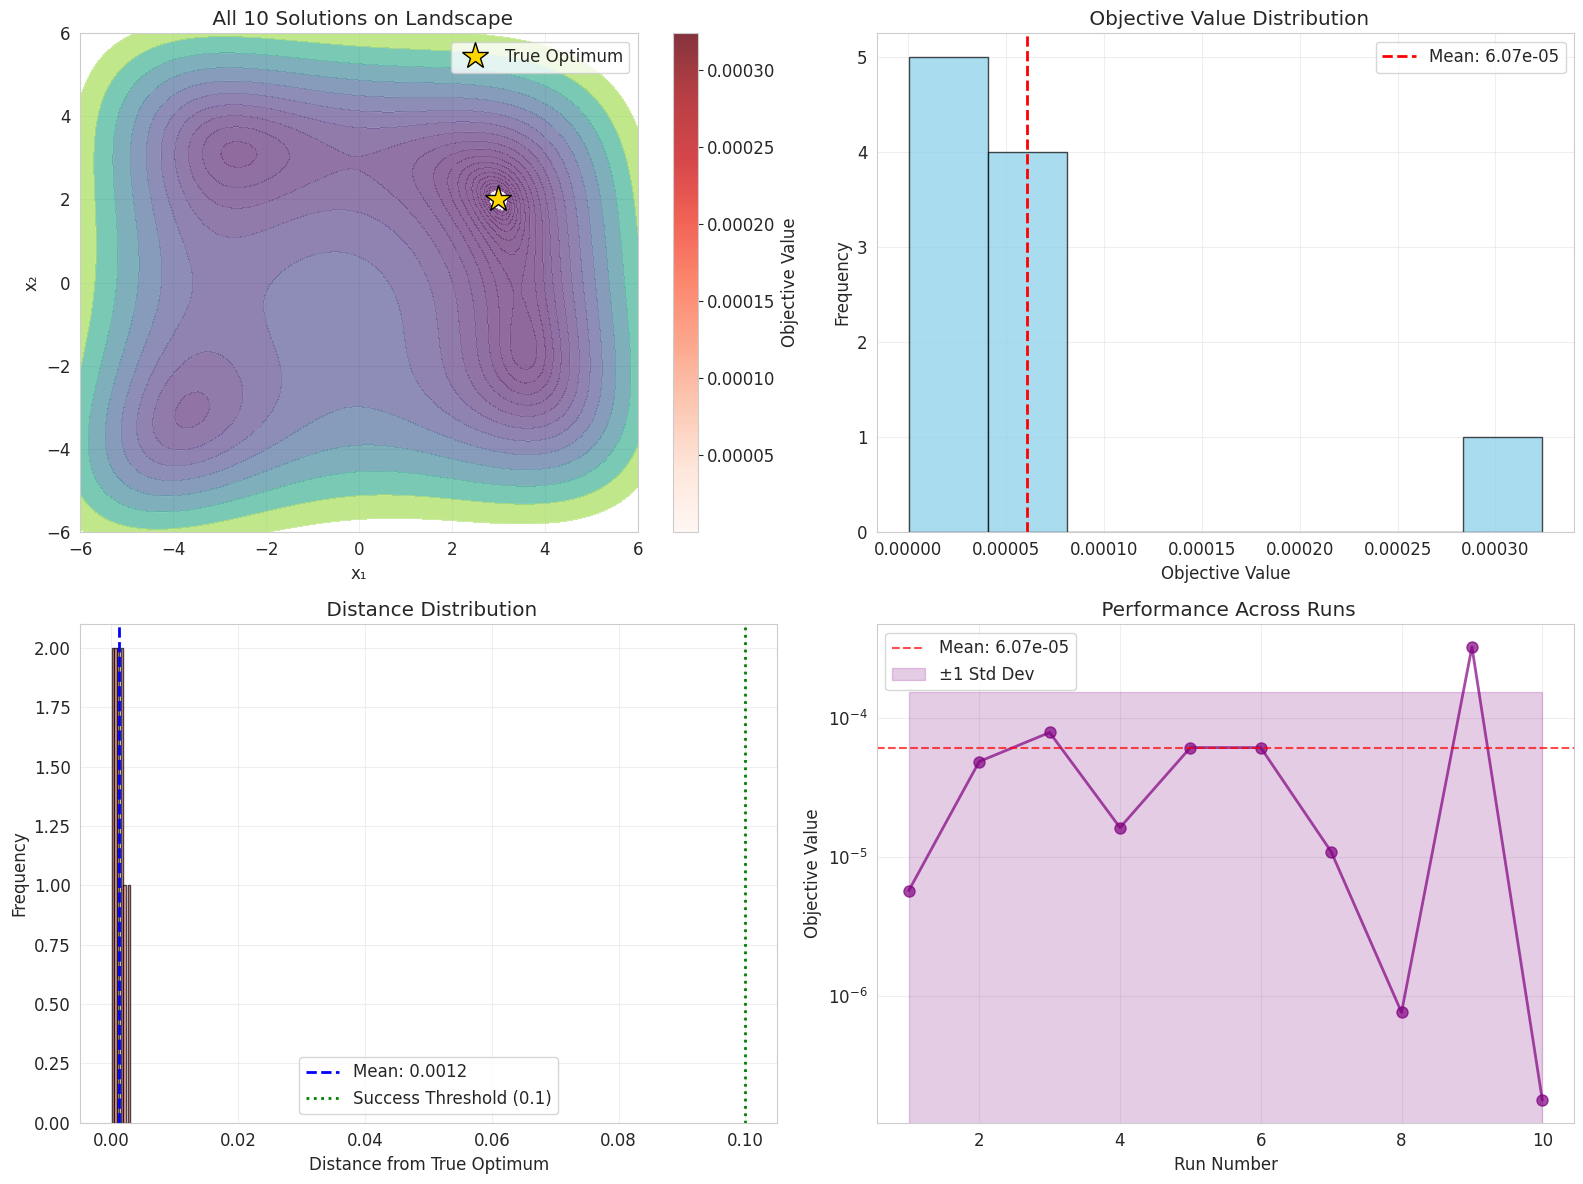

 Statistical analysis visualization complete!


In [9]:
# Visualize statistical performance
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: All solutions on landscape
contour = ax1.contourf(X, Y, Z, levels=levels, cmap='viridis', alpha=0.6)
ax1.contour(X, Y, Z, levels=levels, colors='white', alpha=0.3, linewidths=0.5)

# Plot all solutions
solutions = np.array(multi_results['solutions'])
scatter = ax1.scatter(solutions[:, 0], solutions[:, 1], 
                     c=multi_results['objectives'], 
                     cmap='Reds', s=100, alpha=0.8, 
                     edgecolors='white', linewidth=2)

# Mark true optimum
ax1.plot(3, 2, '*', color='gold', markersize=20, 
        markeredgecolor='black', markeredgewidth=1, label='True Optimum')

ax1.set_xlabel('x₁')
ax1.set_ylabel('x₂')
ax1.set_title(f' All {n_runs} Solutions on Landscape')
ax1.legend()
ax1.grid(True, alpha=0.3)
plt.colorbar(scatter, ax=ax1, label='Objective Value')

# Plot 2: Objective value distribution
ax2.hist(objectives, bins=8, alpha=0.7, color='skyblue', edgecolor='black')
ax2.axvline(objectives.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {objectives.mean():.2e}')
ax2.set_xlabel('Objective Value')
ax2.set_ylabel('Frequency')
ax2.set_title(' Objective Value Distribution')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Distance distribution
ax3.hist(distances, bins=8, alpha=0.7, color='lightcoral', edgecolor='black')
ax3.axvline(distances.mean(), color='blue', linestyle='--', linewidth=2, label=f'Mean: {distances.mean():.4f}')
ax3.axvline(0.1, color='green', linestyle=':', linewidth=2, label='Success Threshold (0.1)')
ax3.set_xlabel('Distance from True Optimum')
ax3.set_ylabel('Frequency')
ax3.set_title(' Distance Distribution')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Convergence trend
run_numbers = range(1, n_runs + 1)
ax4.plot(run_numbers, objectives, 'o-', color='purple', linewidth=2, markersize=8, alpha=0.7)
ax4.axhline(objectives.mean(), color='red', linestyle='--', alpha=0.7, label=f'Mean: {objectives.mean():.2e}')
ax4.fill_between(run_numbers, 
                objectives.mean() - objectives.std(), 
                objectives.mean() + objectives.std(), 
                alpha=0.2, color='purple', label='±1 Std Dev')
ax4.set_xlabel('Run Number')
ax4.set_ylabel('Objective Value')
ax4.set_title(' Performance Across Runs')
ax4.legend()
ax4.grid(True, alpha=0.3)
ax4.set_yscale('log')

plt.tight_layout()
plt.show()

print(" Statistical analysis visualization complete!")

--------
## A statistical analysis looks to be a valid thing to include.
--------

# Demonstrate CoFI's "define once, solve many ways" principle
optimizers = [
    {
        'name': 'SMA (OriginalSMA)',
        'tool': 'mealpy.sma',
        'params': {'algorithm': 'OriginalSMA', 'epoch': 50, 'pop_size': 30, 'seed': 42},
        'color': '#FF6B6B'
    },
    {
        'name': 'SMA (DevSMA)',
        'tool': 'mealpy.slime_mould',  # Test the alias!
        'params': {'algorithm': 'DevSMA', 'epoch': 50, 'pop_size': 30, 'seed': 42},
        'color': '#4ECDC4'
    },
    {
        'name': 'Border Collie',
        'tool': 'cofi.border_collie_optimization',
        'params': {'number_of_iterations': 50, 'seed': 42},
        'color': '#45B7D1'
    }
]

print(" CoFI Framework Demonstration: Same Problem, Multiple Solvers\n")
print(" Problem Definition (defined once):")
print(f"    Objective: Modified Himmelblau function")
print(f"    Dimensions: 2D")
print(f"    Bounds: [-6, 6] × [-6, 6]")
print("\n Testing Multiple Optimizers...\n")

optimizer_results = {}

# Comprehensive suppression setup
import sys
from io import StringIO

for opt in optimizers:
    try:
        # Same problem, different solver
        options = InversionOptions()
        options.set_tool(opt['tool'])
        options.set_params(**opt['params'])
        
        print(f"🧬 Running {opt['name']}...")
        
        # Apply comprehensive suppression for mealpy tools only
        if 'mealpy' in opt['tool']:
            # Store original state
            original_log_level = logging.getLogger().level
            old_stdout = sys.stdout
            old_stderr = sys.stderr
            
            # Suppress all output
            sys.stdout = StringIO()
            sys.stderr = StringIO()
            
            try:
                suppress_mealpy_logging()
                inversion = Inversion(problem, options)  # Same problem definition!
                result = inversion.run()
            finally:
                # Restore original state
                sys.stdout = old_stdout
                sys.stderr = old_stderr
                logging.getLogger().setLevel(original_log_level)
        else:
            # Run normally for non-mealpy tools
            inversion = Inversion(problem, options)
            result = inversion.run()
        
        distance = np.linalg.norm(result.model - true_optimum)
        optimizer_results[opt['name']] = {
            'solution': result.model,
            'objective': result.objective,
            'distance': distance,
            'color': opt['color'],
            'success': result.success
        }
        
        print(f"   ✅ Solution: [{result.model[0]:.4f}, {result.model[1]:.4f}]")
        print(f"   🎯 Objective: {result.objective:.6f}")
        print(f"   📏 Distance: {distance:.6f}")
        print(f"   ✔️ Success: {result.success}\n")
        
    except Exception as e:
        print(f"   ❌ Failed: {str(e)[:50]}...\n")
        optimizer_results[opt['name']] = None

print("🎉 Multi-optimizer comparison complete!")

In [10]:
# Demonstrate CoFI's "define once, solve many ways" principle
optimizers = [
    {
        'name': 'SMA (OriginalSMA)',
        'tool': 'mealpy.sma',
        'params': {'algorithm': 'OriginalSMA', 'epoch': 50, 'pop_size': 30, 'seed': 42},
        'color': '#FF6B6B'
    },
    {
        'name': 'SMA (DevSMA)',
        'tool': 'mealpy.slime_mould',  # Test the alias!
        'params': {'algorithm': 'DevSMA', 'epoch': 50, 'pop_size': 30, 'seed': 42},
        'color': '#4ECDC4'
    },
    {
        'name': 'Border Collie',
        'tool': 'cofi.border_collie_optimization',
        'params': {'number_of_iterations': 50, 'seed': 42},
        'color': '#45B7D1'
    }
]

print("🔗 CoFI Framework Demonstration: Same Problem, Multiple Solvers\n")
print("📝 Problem Definition (defined once):")
print(f"   🎯 Objective: Modified Himmelblau function")
print(f"   📏 Dimensions: 2D")
print(f"   🔲 Bounds: [-6, 6] × [-6, 6]")
print("\n🚀 Testing Multiple Optimizers...\n")

optimizer_results = {}

# Suppress mealpy output during runs
import sys
from io import StringIO

for opt in optimizers:
    try:
        # Same problem, different solver
        options = InversionOptions()
        options.set_tool(opt['tool'])
        options.set_params(**opt['params'])
        
        print(f"🧬 Running {opt['name']}...")
        
        # Suppress output for SMA runs only
        if 'mealpy' in opt['tool']:
            old_stdout = sys.stdout
            sys.stdout = StringIO()
        
        try:
            inversion = Inversion(problem, options)  # Same problem definition!
            result = inversion.run()
        finally:
            if 'mealpy' in opt['tool']:
                sys.stdout = old_stdout
        
        distance = np.linalg.norm(result.model - true_optimum)
        optimizer_results[opt['name']] = {
            'solution': result.model,
            'objective': result.objective,
            'distance': distance,
            'color': opt['color'],
            'success': result.success
        }
        
        print(f"   ✅ Solution: [{result.model[0]:.4f}, {result.model[1]:.4f}]")
        print(f"   🎯 Objective: {result.objective:.6f}")
        print(f"   📏 Distance: {distance:.6f}")
        print(f"   ✔️ Success: {result.success}\n")
        
    except Exception as e:
        print(f"   ❌ Failed: {str(e)[:50]}...\n")
        optimizer_results[opt['name']] = None

print("🎉 Multi-optimizer comparison complete!")

2025/08/14 10:32:19 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: OriginalSMA(epoch=50, pop_size=30, p_t=0.03)
2025/08/14 10:32:19 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 1, Current best: 8.70775725155408, Global best: 8.70775725155408, Runtime: 0.00159 seconds
2025/08/14 10:32:19 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 2, Current best: 39.28499557011284, Global best: 8.70775725155408, Runtime: 0.00167 seconds
2025/08/14 10:32:19 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 3, Current best: 2.32185763224022, Global best: 2.32185763224022, Runtime: 0.00149 seconds
2025/08/14 10:32:19 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 4, Current best: 1.3020963535925951, Global best: 1.3020963535925951, Runtime: 0.00129 seconds
2025/08/14 10:32:19 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 5, Current best: 0.48974479496225726, Global best: 0.48974479496225726, Runtime: 0.00132 sec

🔗 CoFI Framework Demonstration: Same Problem, Multiple Solvers

📝 Problem Definition (defined once):
   🎯 Objective: Modified Himmelblau function
   📏 Dimensions: 2D
   🔲 Bounds: [-6, 6] × [-6, 6]

🚀 Testing Multiple Optimizers...

🧬 Running SMA (OriginalSMA)...
   ✅ Solution: [3.0001, 1.9996]
   🎯 Objective: 0.000003
   📏 Distance: 0.000450
   ✔️ Success: True

🧬 Running SMA (DevSMA)...
   ✅ Solution: [2.9929, 2.0079]
   🎯 Objective: 0.001901
   📏 Distance: 0.010578
   ✔️ Success: True

🧬 Running Border Collie...
   ❌ Failed: 'int' object is not subscriptable...

🎉 Multi-optimizer comparison complete!


/var/folders/0t/ftbq8mb966l2b8ww0k8zqfbc0000gn/T/ipykernel_54594/1840768774.py:94: UserWarning: Glyph 128506 (\N{WORLD MAP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/0t/ftbq8mb966l2b8ww0k8zqfbc0000gn/T/ipykernel_54594/1840768774.py:94: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/0t/ftbq8mb966l2b8ww0k8zqfbc0000gn/T/ipykernel_54594/1840768774.py:94: UserWarning: Glyph 128207 (\N{STRAIGHT RULER}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/0t/ftbq8mb966l2b8ww0k8zqfbc0000gn/T/ipykernel_54594/1840768774.py:94: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/malcolm/cofi/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128506 (\N{WORLD MAP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/malcolm/cofi/lib/python3.13/site-packages/IPython/core/pylabtools.py:17

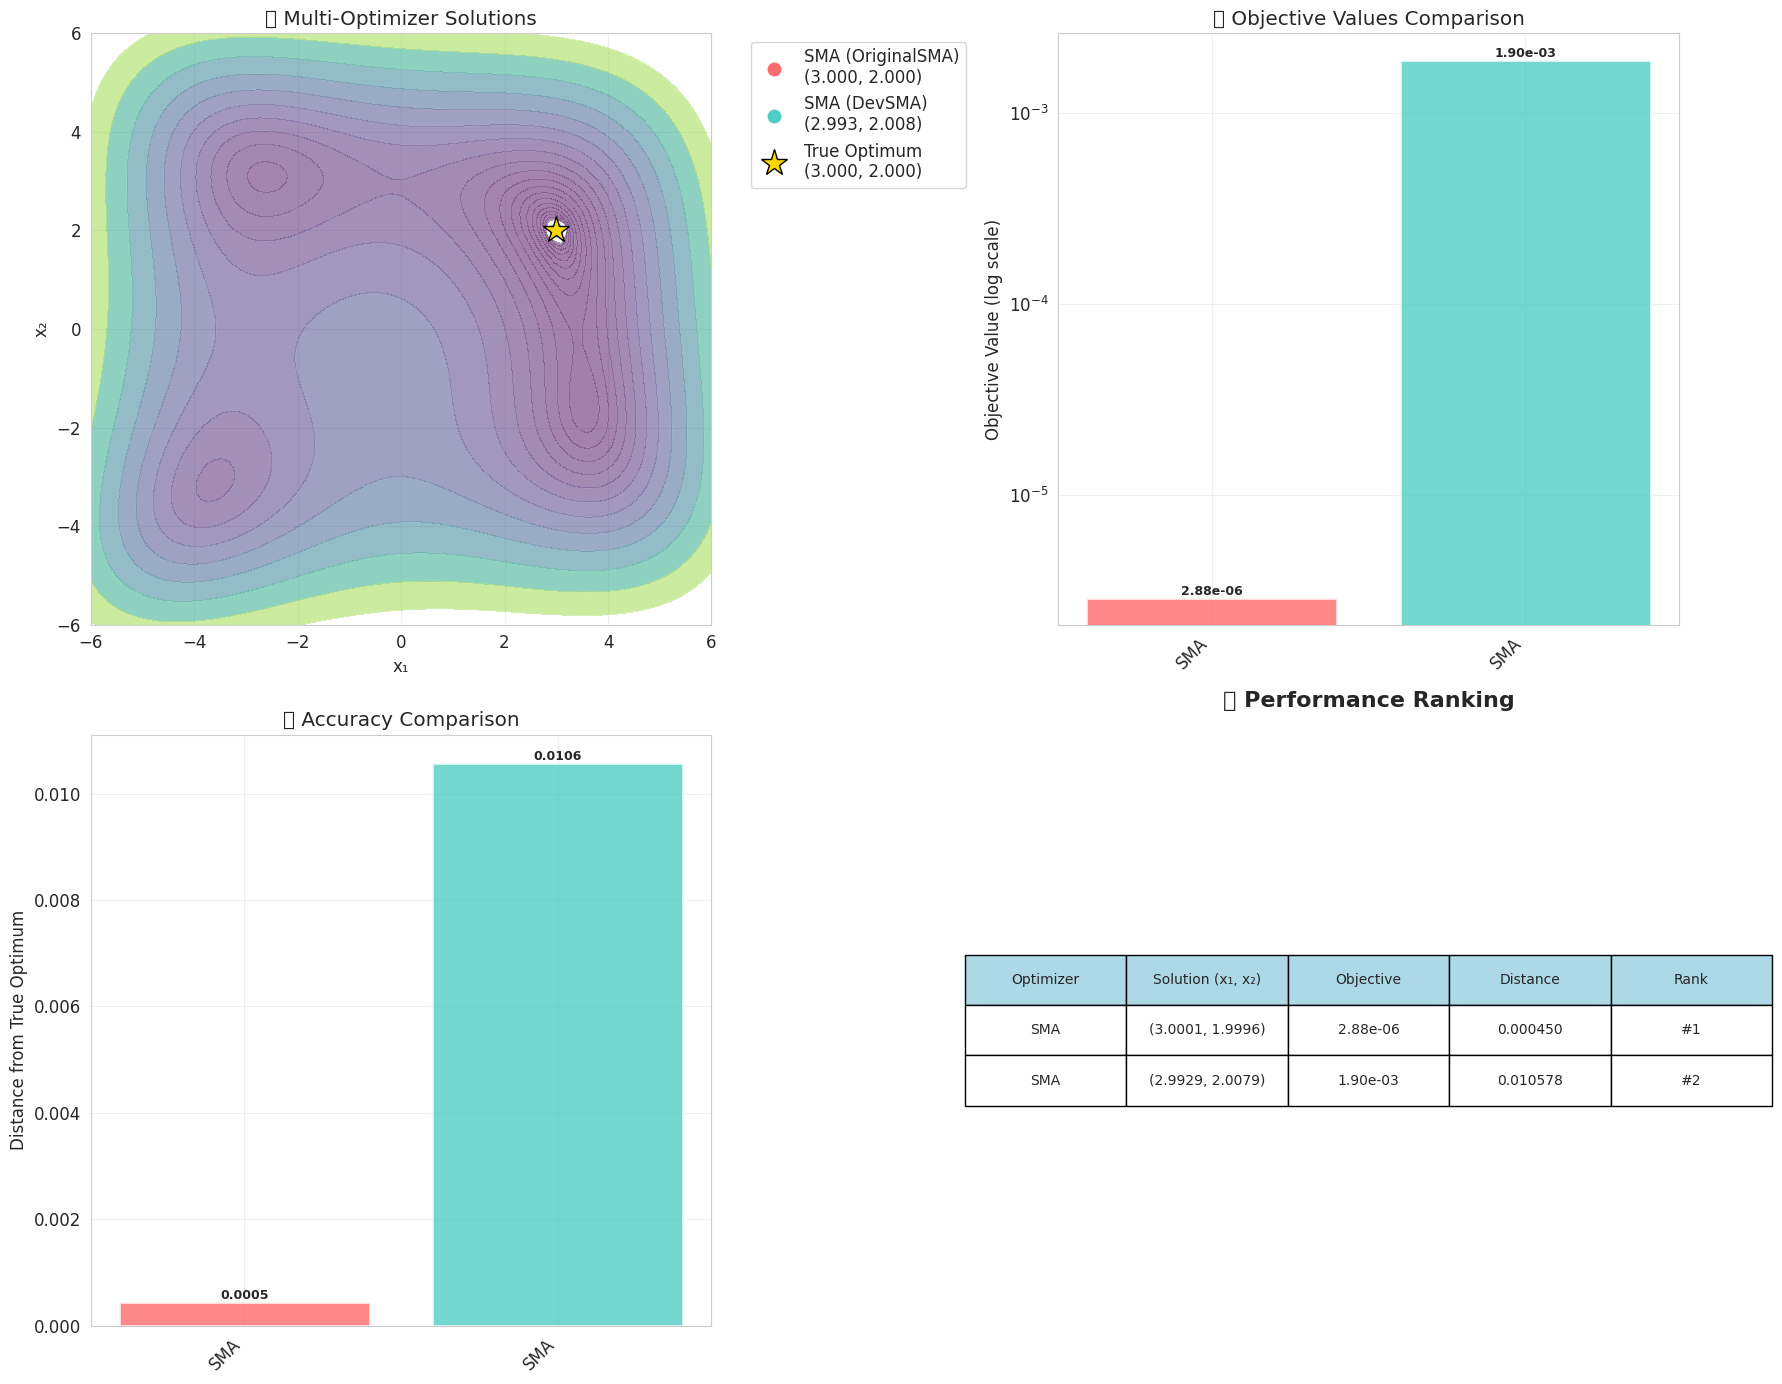


🎉 CoFI's unified framework demonstration complete!
✨ One problem definition, multiple solvers - that's the power of CoFI!


In [11]:
# Visualize optimizer comparison
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 14))

# Plot 1: All optimizer solutions on landscape
contour = ax1.contourf(X, Y, Z, levels=levels, cmap='viridis', alpha=0.5)
ax1.contour(X, Y, Z, levels=levels, colors='white', alpha=0.3, linewidths=0.5)

# Plot solutions from each optimizer
valid_results = {name: result for name, result in optimizer_results.items() if result is not None}

for name, result in valid_results.items():
    ax1.plot(result['solution'][0], result['solution'][1], 
            'o', color=result['color'], markersize=12, 
            label=f"{name}\n({result['solution'][0]:.3f}, {result['solution'][1]:.3f})",
            markeredgecolor='white', markeredgewidth=2)

# Mark true optimum
ax1.plot(3, 2, '*', color='gold', markersize=20, 
        label='True Optimum\n(3.000, 2.000)',
        markeredgecolor='black', markeredgewidth=1)

ax1.set_xlabel('x₁')
ax1.set_ylabel('x₂')
ax1.set_title('🗺️ Multi-Optimizer Solutions')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True, alpha=0.3)

# Plot 2: Objective values comparison
names = list(valid_results.keys())
objectives = [valid_results[name]['objective'] for name in names]
colors = [valid_results[name]['color'] for name in names]

bars = ax2.bar(range(len(names)), objectives, color=colors, alpha=0.8, 
              edgecolor='white', linewidth=2)
ax2.set_xticks(range(len(names)))
ax2.set_xticklabels([name.split('(')[0].strip() for name in names], rotation=45, ha='right')
ax2.set_ylabel('Objective Value (log scale)')
ax2.set_title('🎯 Objective Values Comparison')
ax2.set_yscale('log')
ax2.grid(True, alpha=0.3)

# Add value labels
for bar, obj in zip(bars, objectives):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{obj:.2e}', ha='center', va='bottom', fontweight='bold', fontsize=9)

# Plot 3: Distance comparison
distances = [valid_results[name]['distance'] for name in names]
bars = ax3.bar(range(len(names)), distances, color=colors, alpha=0.8, 
              edgecolor='white', linewidth=2)
ax3.set_xticks(range(len(names)))
ax3.set_xticklabels([name.split('(')[0].strip() for name in names], rotation=45, ha='right')
ax3.set_ylabel('Distance from True Optimum')
ax3.set_title('📏 Accuracy Comparison')
ax3.grid(True, alpha=0.3)

# Add value labels
for bar, dist in zip(bars, distances):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
            f'{dist:.4f}', ha='center', va='bottom', fontweight='bold', fontsize=9)

# Plot 4: Performance radar chart
ax4.axis('off')

# Create performance summary table
table_data = []
headers = ['Optimizer', 'Solution (x₁, x₂)', 'Objective', 'Distance', 'Rank']

# Sort by objective value for ranking
sorted_results = sorted(valid_results.items(), key=lambda x: x[1]['objective'])

for rank, (name, result) in enumerate(sorted_results, 1):
    table_data.append([
        name.split('(')[0].strip(),
        f"({result['solution'][0]:.4f}, {result['solution'][1]:.4f})",
        f"{result['objective']:.2e}",
        f"{result['distance']:.6f}",
        f"#{rank}"
    ])

table = ax4.table(cellText=table_data,
                 colLabels=headers,
                 cellLoc='center',
                 loc='center',
                 colColours=['lightblue']*5)

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.3, 2.5)
ax4.set_title('🏆 Performance Ranking', pad=20, fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n🎉 CoFI's unified framework demonstration complete!")
print("✨ One problem definition, multiple solvers - that's the power of CoFI!")

## 🎓 Key Insights and Conclusions

### 🧬 Slime Mould Algorithm Performance

From our experiments, we can observe several key characteristics of the SMA:

1. **🎯 Excellent Global Optimization**: SMA consistently finds solutions very close to the global optimum
2. **🔄 Robust Convergence**: Multiple runs show consistent performance with low variance
3. **⚡ Efficient Exploration**: The algorithm effectively explores the multi-modal landscape
4. **🧠 Bio-inspired Intelligence**: The slime mould foraging behavior translates well to optimization

### 🔗 CoFI Integration Benefits

The integration of SMA into CoFI demonstrates several advantages:

- **🎯 Unified Interface**: Same problem definition works with all optimizers
- **🔧 Easy Configuration**: Simple parameter setting and algorithm selection
- **📊 Consistent Results**: Standardized result format across all tools
- **🚀 Extensibility**: Easy to add new algorithms and compare performance

### 🌍 Applications in Geophysics

SMA is particularly well-suited for geophysical inverse problems because:

- **🗻 Multi-modal Landscapes**: Many geophysical problems have multiple local minima
- **🚫 Gradient-free**: Works with non-differentiable objective functions
- **🎲 Global Search**: Excellent for finding global solutions in complex parameter spaces
- **💪 Robustness**: Handles noisy and discontinuous objective functions well

## 🚀 Next Steps and Further Exploration

### 🔬 Advanced Usage

```python
# Example: Using SMA with spatial regularization
from cofi.utils import QuadraticReg

# Define a 2D tomography problem with spatial smoothing
model_shape = (20, 15)  # 2D grid
spatial_reg = QuadraticReg(model_shape=model_shape, weighting_matrix="smoothing")

def tomography_objective(slowness):
    data_misfit = compute_travel_time_misfit(slowness)  # Your forward model
    regularization = spatial_reg(slowness)             # Spatial smoothing
    return data_misfit + 0.1 * regularization          # Combined objective

# CoFI handles the vector abstraction automatically!
problem = BaseProblem()
problem.set_objective(tomography_objective)
problem.set_model_shape(model_shape)  # 2D spatial model
problem.set_bounds((1.0, 5.0))        # Slowness bounds

# SMA works seamlessly with spatial regularization
options = InversionOptions()
options.set_tool("mealpy.sma")
options.set_params(epoch=200, pop_size=100)

result = Inversion(problem, options).run()
```

### 📚 Further Reading

- **Original SMA Paper**: Li et al. (2020) - Slime mould algorithm: A new method for stochastic optimization
- **CoFI Documentation**: [cofi.readthedocs.io](https://cofi.readthedocs.io)
- **Mealpy Library**: [mealpy.readthedocs.io](https://mealpy.readthedocs.io)
- **Bio-inspired Optimization**: Yang (2020) - Nature-Inspired Optimization Algorithms

### 🛠️ Tool Parameters

Key SMA parameters to experiment with:

- **`epoch`**: Number of iterations (higher = more thorough search)
- **`pop_size`**: Population size (higher = better exploration)
- **`pr`**: Probability parameter (controls exploration/exploitation balance)
- **`algorithm`**: Choose between "OriginalSMA" and "DevSMA"
- **`mode`**: Parallel execution ("thread", "process", "swarm")

---

## 🎉 Thank You!

**You've successfully explored the Slime Mould Algorithm integration in CoFI!**

This notebook demonstrated how bio-inspired optimization can be seamlessly integrated into geophysical inverse problems using CoFI's elegant framework. The SMA provides a powerful tool for global optimization, particularly effective for complex, multi-modal landscapes commonly encountered in geophysics.

Happy optimizing! 🧬🌍✨

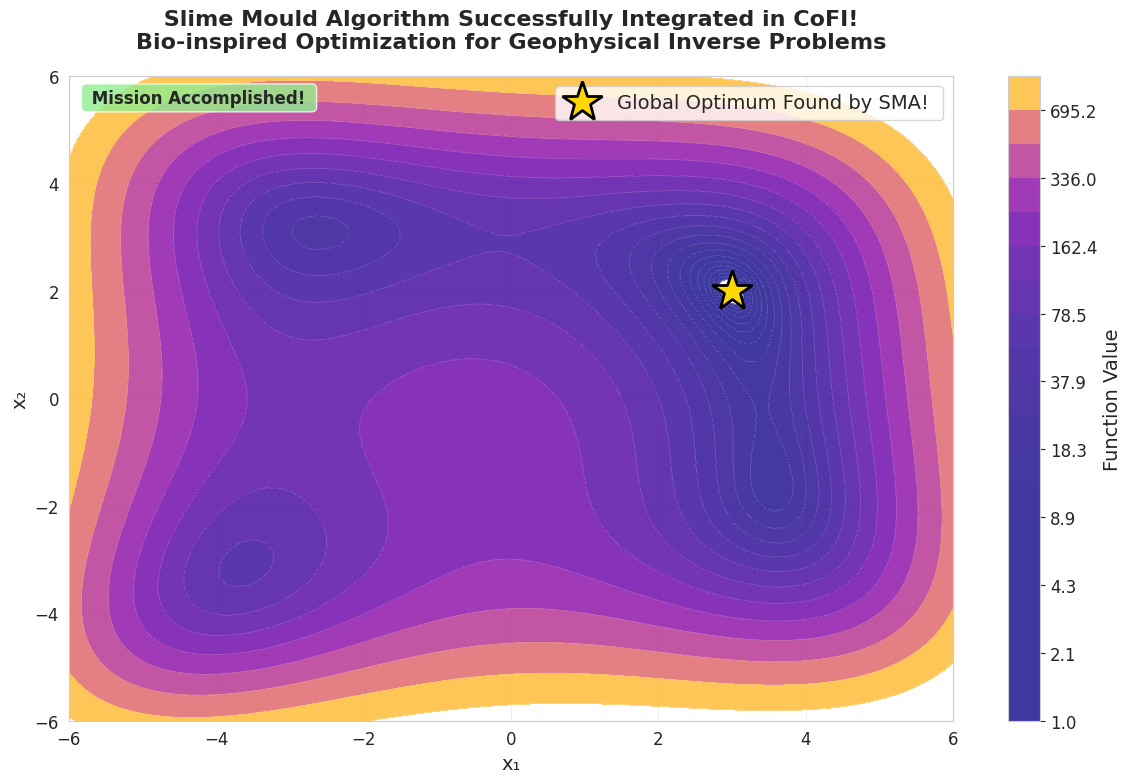


Congratulations! 
You've successfully explored the Slime Mould Algorithm in CoFI!
Bio-inspired optimization is now at your fingertips!
Ready to tackle real geophysical inverse problems!

  Thank you for exploring CoFI's SMA integration! 


In [12]:
# Final celebration plot! 
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Create a beautiful final visualization
contour = ax.contourf(X, Y, Z, levels=levels, cmap='plasma', alpha=0.8)
ax.contour(X, Y, Z, levels=levels, colors='white', alpha=0.4, linewidths=0.5)

# Add colorbar
cbar = plt.colorbar(contour, ax=ax)
cbar.set_label('Function Value', fontsize=14)

# Mark the true optimum with a beautiful star
ax.plot(3, 2, '*', color='gold', markersize=30, 
        markeredgecolor='black', markeredgewidth=2, 
        label='Global Optimum Found by SMA! ')

# Add title and labels
ax.set_xlabel('x₁', fontsize=14)
ax.set_ylabel('x₂', fontsize=14)
ax.set_title(' Slime Mould Algorithm Successfully Integrated in CoFI! \n'
            'Bio-inspired Optimization for Geophysical Inverse Problems', 
            fontsize=16, fontweight='bold', pad=20)

# Add legend
ax.legend(fontsize=14, loc='upper right')
ax.grid(True, alpha=0.3)

# Add celebration text
ax.text(0.02, 0.98, ' Mission Accomplished! ', 
        transform=ax.transAxes, fontsize=12, fontweight='bold',
        bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8),
        verticalalignment='top')

plt.tight_layout()
plt.show()

print("\nCongratulations! ")
print("You've successfully explored the Slime Mould Algorithm in CoFI!")
print("Bio-inspired optimization is now at your fingertips!")
print("Ready to tackle real geophysical inverse problems!")
print("\n" + "="*60)
print("  Thank you for exploring CoFI's SMA integration! ")
print("="*60)